Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\mohit bhade\Downloads\dataset_heart_rate.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing Values are not found

In [6]:
# encoding:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


all data is in numerical so no need to encode the data 

In [7]:
# scaling the numerical features

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

Q2. Split the dataset into a training set (70%) and a test set (30%).

In [8]:
x=df.drop(labels=['target'],axis=1)
y=df['target']

In [9]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [11]:
# Split the data into a training set (70%) and a test set (30%).
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [12]:
# Scaling down:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Train a random forest classifier on the training set

rfc=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [15]:
y_pred=rfc.predict(x_test)

In [16]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [17]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8241758241758241
Precision: 0.84
Recall: 0.84
F1 Score: 0.8399999999999999


In [19]:
important_features=rfc.feature_importances_

In [20]:
feature_names=x.columns

In [21]:
# Create a dataframe with feature importances
feature_df = pd.DataFrame({'Features': feature_names, 'Importance': important_features})

# Sort the dataframe by feature importances
feature_df = feature_df.sort_values(by='Importance', ascending=False)

In [22]:
# Get the top 5 most important features
top_features=feature_df.sort_values(by='Importance',ascending=False)

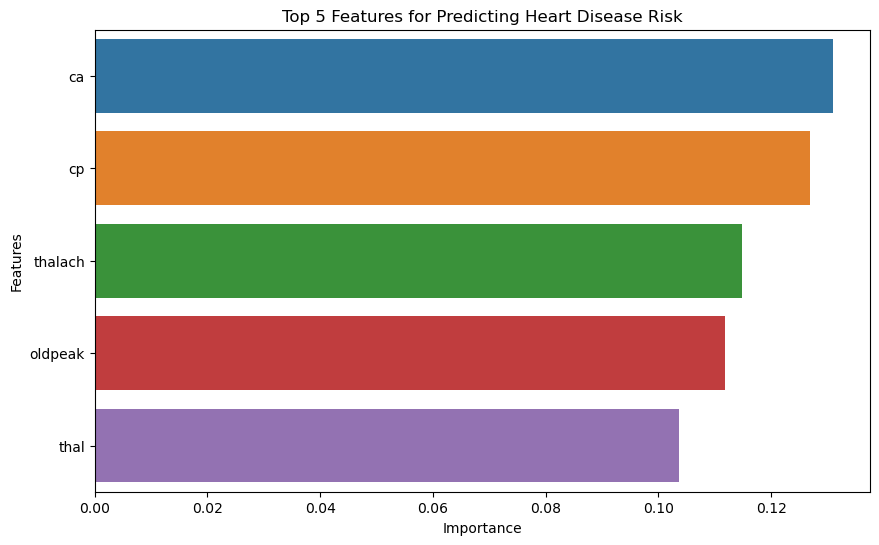

In [23]:
# Visualize the feature importances using a bar chart

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=top_features.head(5))
plt.title('Top 5 Features for Predicting Heart Disease Risk')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [24]:
# hypertuning:

from sklearn.model_selection import GridSearchCV

parametres={ 'n_estimators':[50,60,100,200],
            'max_depth':[1,2,3,5,10,20,30,None],
            'min_samples_split': [1,2, 5, 10],
            'min_samples_leaf': [1, 2,3,4]
}

In [25]:
grid=GridSearchCV(rfc,param_grid=parametres,cv=5,n_jobs=-1)

In [27]:
grid.fit(x_train,y_train)

C:\Users\mohit bhade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
640 fits failed out of a total of 2560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mohit bhade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mohit bhade\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\mohit bhade\anaconda3\lib\site-packages\joblib\parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 5, 10],
                         'n_estimators': [50, 60, 100, 200]})

Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [28]:
# Get the best hyperparameters
best_params = grid.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 50}


In [29]:
best_rfc = RandomForestClassifier(**best_params, random_state=42)
best_rfc.fit(x_train,y_train)
y_pred=best_rfc.predict(x_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8791208791208791
Precision: 0.8679245283018868
Recall: 0.92
F1 Score: 0.8932038834951457


In [31]:
from sklearn.metrics import confusion_matrix,classification_report
print("Performance metrics of the tuned model:")
print(classification_report(y_test, y_pred))

Performance metrics of the tuned model:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.87      0.92      0.89        50

    accuracy                           0.88        91
   macro avg       0.88      0.87      0.88        91
weighted avg       0.88      0.88      0.88        91



In [32]:
confusion_matrix(y_test,y_pred)

array([[34,  7],
       [ 4, 46]], dtype=int64)


Compared to the default model, the tuned model has improved in all performance metrics. The accuracy improved from 0.824 to 0.879, precision improved from 0.84 to 0.867, recall improved from 0.84 to 0.92, and F1 score improved from 0.839 to 0.893. Therefore, the tuned model is a better predictor of heart disease risk than the default model.

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [35]:
from sklearn.tree import plot_tree

C:\Users\mohit bhade\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


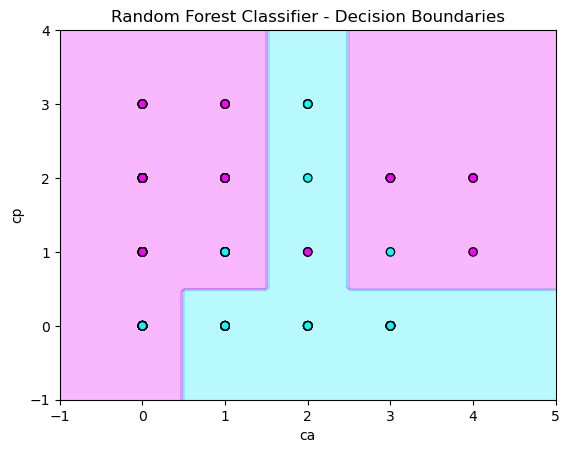

In [36]:
# Select the two most important features
X = df[['ca', 'cp']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the random forest classifier
rf = RandomForestClassifier(**best_params, random_state=42)
rf.fit(X_train, y_train)

# Determine the boundaries of the plot
xlim = (X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1)
ylim = (X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1)

# Plot the decision boundaries for the two most important features
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='cool')

# Plot the training data
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='cool', edgecolor='k')
plt.xlabel('ca')
plt.ylabel('cp')
plt.title('Random Forest Classifier - Decision Boundaries')
plt.show()